In [1]:
import os

from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.teams import RoundRobinGroupChat
from autogen_agentchat.ui import Console
from autogen_ext.models.openai import AzureOpenAIChatCompletionClient
from dotenv import load_dotenv

load_dotenv()

api_version = os.getenv("AZURE_OPENAI_API_VERSION")
api_key = os.getenv("AZURE_OPENAI_API_KEY")
azure_endpoint = os.getenv("AZURE_OPENAI_ENDPOINT")
deployment_name = os.getenv("AZURE_OPENAI_DEPLOYMENT_NAME")
azure_openai_chat_completion_client = AzureOpenAIChatCompletionClient(
            model=deployment_name,
            azure_endpoint=azure_endpoint,
            api_version=api_version,
            api_key=api_key,
        )

# Define a tool
async def get_weather(city: str) -> str:
    return f"The weather in {city} is 73 degrees and Sunny."


async def main() -> None:
    # Define an agent
    weather_agent = AssistantAgent(
        name="weather_agent",
        model_client=azure_openai_chat_completion_client,
        tools=[get_weather],
    )

    # Define a team with a single agent and maximum auto-gen turns of 1.
    agent_team = RoundRobinGroupChat([weather_agent], max_turns=1)

    while True:
        # Get user input from the console.
        user_input = input("Enter a message (type 'exit' to leave): ")
        if user_input.strip().lower() == "exit":
            break
        # Run the team and stream messages to the console.
        stream = agent_team.run_stream(task=user_input)
        await Console(stream)


# NOTE: if running this inside a Python script you'll need to use asyncio.run(main()).
await main()

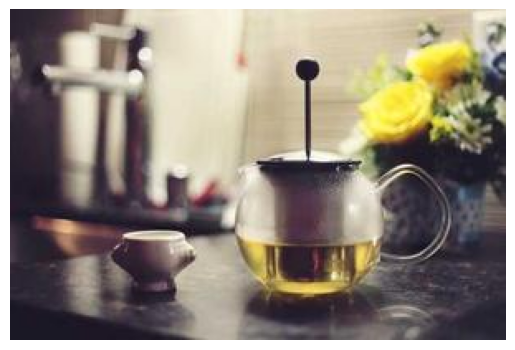

['This image shows a glass teapot with a metal lid and a plunger on top, containing yellow-green tea. It is placed on a dark surface, likely a kitchen counter or table. Next to the teapot is a small white teacup. In the background, there is a bouquet of flowers with yellow and blue blossoms, adding a touch of color to the scene. The setting has a cozy and warm ambiance, possibly in a kitchen or a dining area.']
id='8a8d30ff-a9fd-4813-96a1-ebae98d0ab35' source='assistant' models_usage=RequestUsage(prompt_tokens=99, completion_tokens=95) metadata={} created_at=datetime.datetime(2025, 7, 18, 2, 8, 1, 611145, tzinfo=datetime.timezone.utc) content='This image shows a glass teapot with a metal lid and a plunger on top, containing yellow-green tea. It is placed on a dark surface, likely a kitchen counter or table. Next to the teapot is a small white teacup. In the background, there is a bouquet of flowers with yellow and blue blossoms, adding a touch of color to the scene. The setting has a c

In [ ]:
from autogen_agentchat.messages import TextMessage

text_message = TextMessage(content="Hello, world!", source="User")

from io import BytesIO

import matplotlib.pyplot as plt
import requests
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import CancellationToken
from autogen_core import Image as AGImage
from PIL import Image

pil_image = Image.open(BytesIO(requests.get("https://picsum.photos/300/200").content))
img = AGImage(pil_image)
multi_modal_message = MultiModalMessage(content=["Can you describe the content of this image?", img], source="User")
plt.imshow(pil_image) 
plt.axis('off') 
plt.show()

agent = AssistantAgent(
    name="assistant",
    model_client=azure_openai_chat_completion_client,
    system_message="Use tools to solve tasks.",
)

async def assistant_run() -> None:
    response = await agent.on_messages(
        [multi_modal_message],
        cancellation_token=CancellationToken(),
    )

    print([response.chat_message.content])

    print(response.chat_message)



# Use asyncio.run(assistant_run()) when running in a script.
await assistant_run()

In [ ]:
from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.messages import TextMessage
from autogen_core import CancellationToken


# Define a tool that searches the web for information.
async def web_search(query: str) -> str:
    """Find information on the web"""
    return "AutoGen is a programming framework for building multi-agent applications."


# Create an agent that uses the OpenAI GPT-4o model.
model_client = azure_openai_chat_completion_client
agent = AssistantAgent(
    name="assistant",
    model_client=model_client,
    tools=[web_search],
    system_message="Use tools to solve tasks.",
)

async def assistant_run() -> None:
    response = await agent.on_messages(
        [TextMessage(content="Find information on AutoGen", source="user")],
        cancellation_token=CancellationToken(),
    )
    print(response.inner_messages)
    print(response.chat_message.content)


# Use asyncio.run(assistant_run()) when running in a script.
await assistant_run()

[ToolCallRequestEvent(id='742a2bb5-3dbb-4e11-bad8-1aef025a891c', source='assistant', models_usage=RequestUsage(prompt_tokens=60, completion_tokens=15), metadata={}, created_at=datetime.datetime(2025, 7, 18, 2, 25, 39, 283473, tzinfo=datetime.timezone.utc), content=[FunctionCall(id='call_ril7UgFKM1Br3kS8xZGSkg5c', arguments='{"query":"SK"}', name='web_search')], type='ToolCallRequestEvent'), ToolCallExecutionEvent(id='c02033d3-6d1a-485c-9af8-42c75a522717', source='assistant', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 18, 2, 25, 39, 284261, tzinfo=datetime.timezone.utc), content=[FunctionExecutionResult(content='AutoGen is a programming framework for building multi-agent applications.', name='web_search', call_id='call_ril7UgFKM1Br3kS8xZGSkg5c', is_error=False)], type='ToolCallExecutionEvent')]
AutoGen is a programming framework for building multi-agent applications.


In [7]:
from autogen_agentchat.agents import UserProxyAgent
from autogen_agentchat.messages import TextMessage
from autogen_core import CancellationToken


async def user_proxy_run() -> None:
    user_proxy_agent = UserProxyAgent("user_proxy")
    response = await user_proxy_agent.on_messages(
        [TextMessage(content="What is your name? ", source="user")], cancellation_token=CancellationToken()
    )
    print(f"Your name is {response.chat_message.content}")


# Use asyncio.run(user_proxy_run()) when running in a script.
await user_proxy_run()

Your name is hakjun


In [8]:
from autogen_agentchat.ui import Console


async def assistant_run_stream() -> None:
    # Option 1: read each message from the stream (as shown in the previous example).
    # async for message in agent.on_messages_stream(
    #     [TextMessage(content="Find information on AutoGen", source="user")],
    #     cancellation_token=CancellationToken(),
    # ):
    #     print(message)

    # Option 2: use Console to print all messages as they appear.
    await Console(
        agent.on_messages_stream(
            [TextMessage(content="Find information on AutoGen", source="user")],
            cancellation_token=CancellationToken(),
        )
    )


# Use asyncio.run(assistant_run_stream()) when running in a script.
await assistant_run_stream()

---------- ToolCallRequestEvent (assistant) ----------
[FunctionCall(id='call_TH37ktLVBoBsQLbnI8Nj42Ut', arguments='{"query":"AutoGen"}', name='web_search')]
---------- ToolCallExecutionEvent (assistant) ----------
[FunctionExecutionResult(content='AutoGen is a programming framework for building multi-agent applications.', name='web_search', call_id='call_TH37ktLVBoBsQLbnI8Nj42Ut', is_error=False)]
---------- assistant ----------
AutoGen is a programming framework for building multi-agent applications.


In [2]:
from autogen_core.memory import ListMemory, MemoryContent, MemoryMimeType

# Initialize user memory
user_memory = ListMemory()

# Add user preferences to memory
await user_memory.add(MemoryContent(content="난 고양이를 좋아해", mime_type=MemoryMimeType.TEXT))

await user_memory.add(MemoryContent(content="내 생일은 7월 31 일이야", mime_type=MemoryMimeType.TEXT))

assistant_agent = AssistantAgent(
    name="assistant_agent",
    model_client=azure_openai_chat_completion_client,
    memory=[user_memory],
)

stream = assistant_agent.run_stream(task="내 생일은 언제야? 내가 좋아하는 애완동물은?")
await Console(stream)

---------- TextMessage (user) ----------
내 생일은 언제야? 내가 좋아하는 애완동물은?
---------- MemoryQueryEvent (assistant_agent) ----------
[MemoryContent(content='난 고양이를 좋아해', mime_type=<MemoryMimeType.TEXT: 'text/plain'>, metadata=None), MemoryContent(content='내 생일은 7월 31 일이야', mime_type=<MemoryMimeType.TEXT: 'text/plain'>, metadata=None)]
---------- TextMessage (assistant_agent) ----------
당신의 생일은 7월 31일이고, 좋아하는 애완동물은 고양이입니다.


TaskResult(messages=[TextMessage(id='a2a3efbd-586b-43b3-9788-37c12e871b1b', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 22, 4, 28, 31, 236165, tzinfo=datetime.timezone.utc), content='내 생일은 언제야? 내가 좋아하는 애완동물은?', type='TextMessage'), MemoryQueryEvent(id='9ec70cd8-b6d2-4935-9163-fcc5b58df6d1', source='assistant_agent', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 22, 4, 28, 31, 238702, tzinfo=datetime.timezone.utc), content=[MemoryContent(content='난 고양이를 좋아해', mime_type=<MemoryMimeType.TEXT: 'text/plain'>, metadata=None), MemoryContent(content='내 생일은 7월 31 일이야', mime_type=<MemoryMimeType.TEXT: 'text/plain'>, metadata=None)], type='MemoryQueryEvent'), TextMessage(id='e307609b-b725-4e8b-b8da-9555bf617022', source='assistant_agent', models_usage=RequestUsage(prompt_tokens=88, completion_tokens=27), metadata={}, created_at=datetime.datetime(2025, 7, 22, 4, 28, 33, 787799, tzinfo=datetime.timezone.utc), content='당신의 생일은 7월 31일이고